### 목표 : 무게에 따른 길이를 예측해주는 모델
- 데이터 : fish.csv
- 피처/특성 : 무게
- 라벨/타겟 : 길이
- 학습 방법 : 지도학습 + 예측 => KNN기반의 회귀
- 학습/테스트 : 7:3 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

In [2]:
data_file = '../DATA/fish.csv'

In [3]:
# 데이터 준비
fishDF = pd.read_csv(data_file, usecols = [0, 1, 2])
fishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [4]:
# 학습에 사용할 데이터 추출 => Perch 행만 추출
perchDF = fishDF[fishDF.Species == 'Perch']

# 인덱스 정렬
perchDF.reset_index(drop = True, inplace = True)

In [5]:
perchDF.shape

(56, 3)

In [6]:
perchDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  56 non-null     object 
 1   Weight   56 non-null     float64
 2   Length   56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [7]:
perchDF.head()

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4


In [8]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [9]:
featureDF = perchDF[['Weight']]
targetDF = perchDF[['Length']]

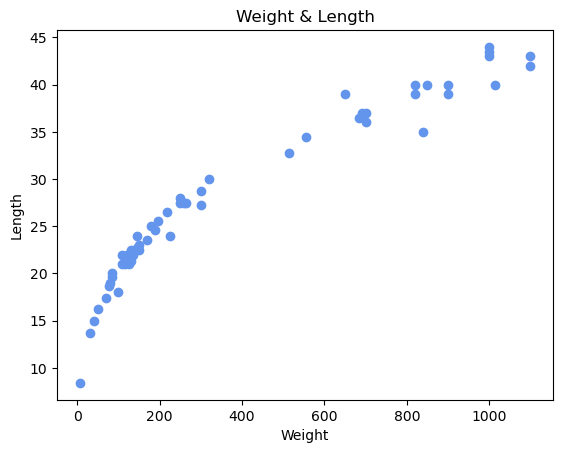

In [10]:
plt.scatter(featureDF.values, targetDF.values, color = 'cornflowerblue')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.title('Weight & Length')
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetDF,
                                                    test_size = 0.3, random_state = 42)

In [12]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9192157528131609

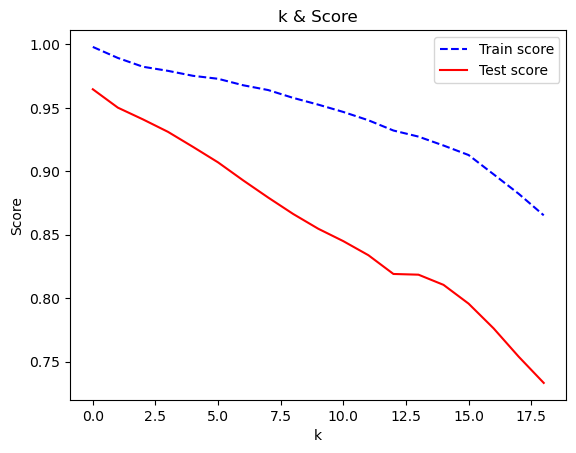

최적의 이웃 개수 k = 1
max score = 0.9646390528128945


In [13]:
max_k = 20
train_scoreList = []
test_scoreList = []
for k in range(1, max_k):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    train_scoreList.append(model.score(X_train, y_train))
    test_scoreList.append(model.score(X_test, y_test))

 # k에 따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, 'b--', label = 'Train score')
plt.plot(test_scoreList, 'r', label = 'Test score')
plt.title('k & Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.show()

print(f'최적의 이웃 개수 k = {test_scoreList.index(max(test_scoreList))+1}')
print(f'max score = {max(test_scoreList)}')

In [14]:
model = KNeighborsRegressor(n_neighbors = 1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9646390528128945

In [15]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9979992479258801, 0.9646390528128945)

In [16]:
y_pre = model.predict(featureDF)
y_pre = np.round(y_pre, 1)
y_pre

array([[13.7],
       [13.7],
       [15. ],
       [15. ],
       [17.4],
       [21. ],
       [19. ],
       [19. ],
       [20. ],
       [20. ],
       [21. ],
       [21. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [21. ],
       [22. ],
       [23. ],
       [24. ],
       [23. ],
       [23.5],
       [24. ],
       [24. ],
       [25. ],
       [25. ],
       [25.6],
       [26.5],
       [28.7],
       [27.5],
       [27.5],
       [27.5],
       [27.5],
       [28.7],
       [28.7],
       [32.8],
       [34.5],
       [35. ],
       [36.5],
       [36. ],
       [36. ],
       [37. ],
       [40. ],
       [39. ],
       [39. ],
       [40. ],
       [40. ],
       [40. ],
       [39. ],
       [43. ],
       [43. ],
       [43. ],
       [43. ],
       [43. ]])

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 결정계수 값
print(r2_score(perchDF.Length, y_pre))

# 평균제곱오차
print(mean_squared_error(perchDF.Length, y_pre))

# 평균절댓값오차
print(mean_absolute_error(perchDF.Length, y_pre))

# 루트평균제곱오차 : RMSE는 1.4버전에서 추가
print(mean_squared_error(perchDF.Length, y_pre, squared = False))

0.9882117123988442
0.9423214285714282
0.4339285714285714
0.9707324186259714


(6) 테스트 <hr>
- 제대로 만들어진 모델인지 확인하는 과정
    * 훈련용 데이터에 대한 점수
    * 테스트용 데이터에 대한 점수
    * 훈련점수와 테스트점수를 비교
        - 훈련점수 > 테스트점수 : 과대적합(overfitting)
        - 훈련점수와 ≒ 테스트점수 : 최적적합
        - 훈련점수 ▼, 테스트점수 ▼: 과소적합(underfitting)